<a href="https://colab.research.google.com/github/BrovkoD/ensembles-here-and-there/blob/master/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bagging

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [ ]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Split into train, validation, and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Defining weak classifiers and their ensembles

In [ ]:
# Classifiers
mlp = MLPClassifier(random_state=42, max_iter=1000)
svm = SVC(probability=True, random_state=42)

# Bagging classifiers with jackknife approximation
bag_mlp = BaggingClassifier(estimator=mlp, n_estimators=10, bootstrap=False, random_state=42)
bag_svm = BaggingClassifier(estimator=svm, n_estimators=10, bootstrap=False, random_state=42)

# Combined ensemble
voting = VotingClassifier(estimators=[('mlp', bag_mlp), ('svm', bag_svm)], voting='soft')

### Training and evaluation of models

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
bag_mlp.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=MLPClassifier(max_iter=1000, random_state=42),
                  random_state=42)

In [ ]:
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
bag_svm.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=SVC(probability=True, random_state=42),
                  random_state=42)

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('mlp',
                              BaggingClassifier(bootstrap=False,
                                                estimator=MLPClassifier(max_iter=1000,
                                                                        random_state=42),
                                                random_state=42)),
                             ('svm',
                              BaggingClassifier(bootstrap=False,
                                                estimator=SVC(probability=True,
                                                              random_state=42),
                                                random_state=42))],
                 voting='soft')

In [ ]:
# Evaluate function
def evaluate(model, X_val, y_val, X_test, y_test):
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return {
        'Average Accuracy (test)': accuracy_score(y_test, test_preds),
        'Average Accuracy (validation)': accuracy_score(y_val, val_preds),
        'Average Precision (validation)': precision_score(y_val, val_preds),
        'F1 Score': f1_score(y_val, val_preds)
    }

# Get metrics
results = {
    'Weak Classifier 1 (MLP)': evaluate(mlp, X_val, y_val, X_test, y_test),
    'Ensemble (MLP)': evaluate(bag_mlp, X_val, y_val, X_test, y_test),
    'Weak Classifier 2 (SVM)': evaluate(svm, X_val, y_val, X_test, y_test),
    'Ensemble (SVM)': evaluate(bag_svm, X_val, y_val, X_test, y_test),
    'Combined Ensemble (MLP + SVM)': evaluate(voting, X_val, y_val, X_test, y_test)
}

df_results = pd.DataFrame(results).T

In [ ]:
df_results

,Average Accuracy (test),Average Accuracy (validation),Average Precision (validation),F1 Score
Weak Classifier 1 (MLP),0.973684,0.964912,0.959459,0.972603
Ensemble (MLP),0.982456,0.982456,0.972973,0.986301
Weak Classifier 2 (SVM),0.947368,0.938596,0.922078,0.953020
Ensemble (SVM),0.964912,0.956140,0.946667,0.965986
Combined Ensemble (MLP + SVM),0.982456,0.982456,0.972973,0.986301


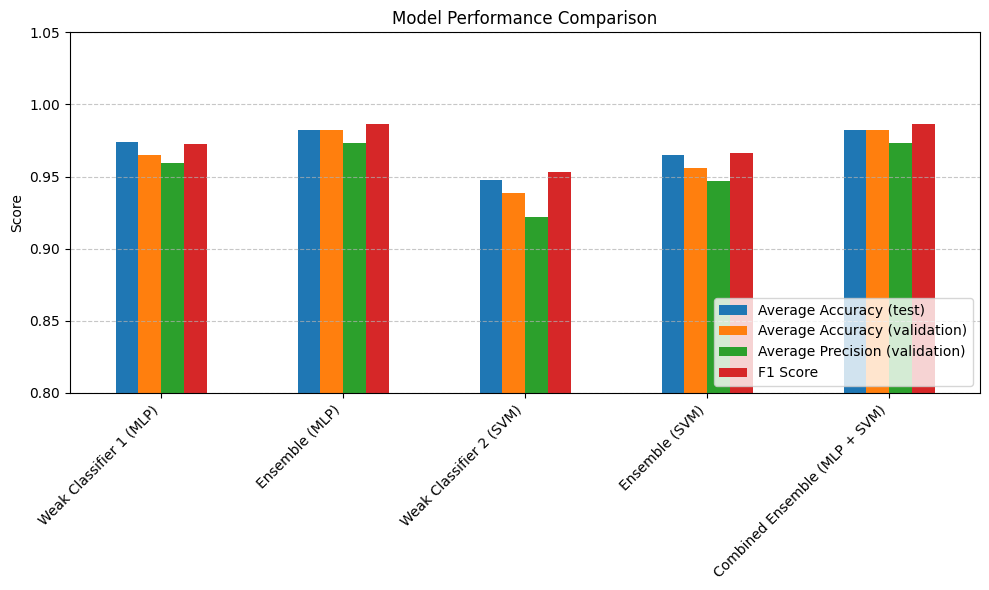

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_results[['Average Accuracy (test)', 'Average Accuracy (validation)',
            'Average Precision (validation)', 'F1 Score']].plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.8, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()